# Homework 9

## ASTR 5900, Fall 2017, University of Oklahoma

### Principal Components Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from colours import bcolors
import pickle
import scipy
import sklearn.datasets as skdata
from mpl_toolkits.mplot3d import Axes3D
import random
import matplotlib.colors as colors
import os
from time import sleep

# Problem 1

Load the iris data, which is a classic data set often used in machine learning examples.  It can be accessed via `sklearn` by calling `sklearn.datasets.load_iris`.  This returns an object whose attributes is what we are after: `object.data` is the data, `object.target` is the labels.

You will want to understand what these numbers mean. You should read up on the iris data here: https://archive.ics.uci.edu/ml/datasets/iris

Perform PCA from scratch on this data.  Print the principal components and the corresponding eigenvalues.  Determine the fraction of the variance contributed by each eigenvector.

Determine the 2 "most important" correlations and project the original data onto these components.  Plot the results using `matplotlib.pyplot`.  Color the new data points based on their target labels.

When you are done, answer the discussion prompt below.

In [2]:
iris_data,iris_tags = skdata.load_iris(return_X_y=True)
iris_labels=np.array(["sepal length (cm)",\
             "sepal width (cm)",\
             "petal length (cm)",\
             "petal width (cm)"])

In [3]:
print(iris_data.shape)
print(iris_tags.shape)
print(iris_labels.shape)

(150, 4)
(150,)
(4,)


In [4]:
def plotting(iris_data,iris_labels,iris_tags,interactive=False,ddims=3):
    if ddims==3:
        if interactive:
            %matplotlib notebook
            plt.clf()
            fig = plt.figure(figsize=[10,7])
            plt.title("Iris Data")
            ax = Axes3D(fig, elev=-150, azim=110)
            ax.scatter(iris_data[:,0],iris_data[:,1],iris_data[:,2],c=iris_tags)
            ax.set_xlabel(iris_labels[0])
            ax.set_ylabel(iris_labels[1])
            ax.set_zlabel(iris_labels[2])
        else:
            plt.clf()
            fig = plt.figure(figsize=[10,7])
            plt.title("Iris Data")
            ax = Axes3D(fig, elev=-150, azim=80)
            ax.scatter(iris_data[:,0],iris_data[:,1],iris_data[:,2],c=iris_tags)
            ax.set_xlabel(iris_labels[0])
            ax.set_ylabel(iris_labels[1])
            ax.set_zlabel(iris_labels[2])   
            plt.show()
    elif ddims <3:
            plt.clf()
            fig = plt.figure(figsize=[10,7])
            plt.title("Iris Data")
            plt.scatter(iris_data[:,0],iris_data[:,1],c=iris_tags)
            plt.xlabel(iris_labels[0])
            plt.ylabel(iris_labels[1])
            plt.show()

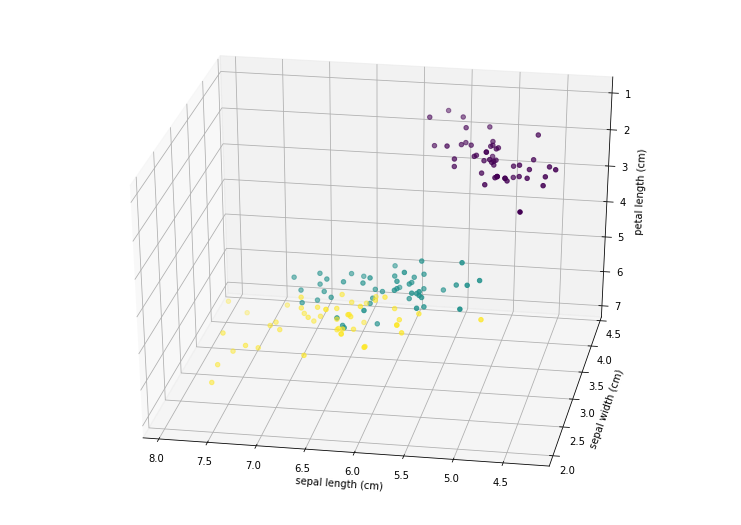

In [5]:
plotting(iris_data,iris_labels,iris_tags,interactive=False)
'''
rescale = iris_data
rescale -= rescale.mean(axis=0)
rescale /= np.std(iris_data,axis=0)
plotting(rescale,iris_labels,iris_tags,interactive=False)
'''
print(" ")

In [6]:
'''
For PCA need to just:
>>> find cov for data
>>> find eigval/eigenvec for cov
'''
# covariance
def cov(X,rowvar=False):
    return np.cov(X,rowvar=rowvar)
# eigenvals and vectors sorted from covariance
def eig(X,demote=None):
    evals,evecs = scipy.linalg.eigh(X)
    index = np.argsort(evals)[::-1][:demote]
    return np.array(evals[index]),np.array(evecs[:,index])
# matrix multiplication
def mmult(X,Y):
    return np.dot(X,Y)
# PCA
def pca(X,demote=None):
    X -= X.mean(axis=0) # centers
    X /= np.std(X,axis=0) # rescales
    covar = cov(X)
    eigval,eigvec = eig(covar,demote)
    return eigval,eigvec,mmult(eigvec.T,X.T).T

In [7]:
eival,eivec,matrix = pca(iris_data.copy())
'''
print(eival)
print(eivec)
print(matrix)
'''
print(eival.shape,iris_data.shape,matrix.shape)

((4,), (150, 4), (150, 4))


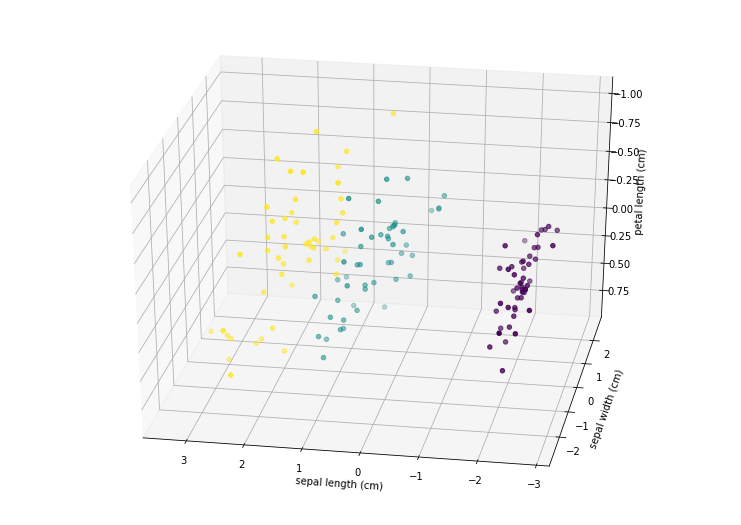

In [8]:
plotting(matrix,iris_labels,iris_tags,interactive=False)

In [9]:
percentages = [x/np.sum(eival)*100. for x in eival]
print("Percentages for eigenvalues: {}%".format(percentages[:]))

Percentages for eigenvalues: [72.770452093801367, 23.030523267680607, 3.6838319576273935, 0.51519268089062797]%


((2,), (150, 4), (150, 2))


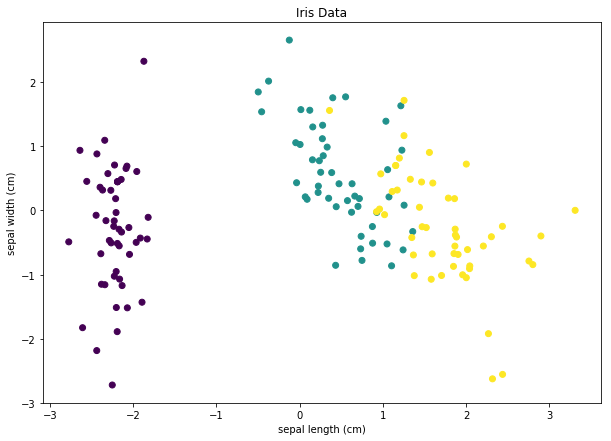

In [10]:
eival_new,eivec_new,matrix_new = pca(iris_data,2)
'''
print(eival)
print(eivec)
print(matrix)
'''
print(eival_new.shape,iris_data.shape,matrix_new.shape)
plotting(matrix_new,iris_labels,iris_tags,interactive=False,ddims=2)

### Discussion

Comment on your results.  Interpret the principal components.  Remember the PCA did not use the target labels in its calculation.

### The highest variance is between the first two eigenvectors or the sepal width and length. You can pretty much reduce the dataset to the 4 principle components easily, or if you remove a little more info, can reduce it to 2 components. This allows for quick analysis of the dataset

# Problem 2

You are to use `empca` on spectral data as in the lecture.  Information can be found here: https://github.com/sbailey/empca.  You can download the module from the same link.  In order to import `empca`, `empca.py` must be listed in your PYTHONPATH or located in the directory you are working in.

The data can be accessed in the class GitHub repository in `/data/quasar/`.  There are 3 .npy files containing the spectral data, data weights, and sampled wavelengths.  Each can be loaded by calling `numpy.load`.

The data containes fluxes and weights for 480 SDSS quasar spectra.
The data is already normalized; they were normalized by
dividing by the flux in an emission-line-free band near 1700
angstroms.  A power law model was used to subtract the continuum from
the accretion disk, leaving behind the emission line spectrum.  Thus,
you do not have to normalize them, but you do have to do the rest of
the analysis, e.g., detminining the weighed mean spectrum and
subtracting it.

### Part A

Load the data then subtract the weighted mean from each object.  Plot the mean data of each wavelength.

In [13]:
filename="empca.py"
web="https://github.com/sbailey/empca.git"
rawweb="https://raw.githubusercontent.com/sbailey/empca/master/empca.py"
while True:
    if os.path.isfile(filename):
        from empca import empca
        break
    else:
        try:
            os.system("wget " + rawweb)
        except IOError:
            print("Grab file from "+web)
            print(bcolors.FAIL+"FAILED"+bcolors._RST_)
            break

In [15]:
location='quasars'
if os.path.isdir(location):
    try:
        qdata = np.load(location+'/data.npy')
        qwave = np.load(location+'/wavelengths.npy')
        qwght = np.load(location+'/weights.npy')
        print(bcolors.OKGREEN+"Success"+bcolors._RST_)
    except IOError:
        print(bcolors.WARNING+'couldn\'t find files'+bcolors._RST_)
else:
    print(bcolors.WARNING+'couldn\'t find '+location+bcolors._RST_)

Success


In [16]:
print(qdata.shape,qwave.shape,qwght.shape)
print qwght

((1801, 480), (1801,), (1801, 480))
[[  129.84132318   130.79490434   125.57433303 ...,   119.92606829
    123.6617476    115.24295689]
 [  124.61553663   124.19636807   127.23153168 ...,   118.80914306
    124.24759544   116.91825243]
 [  137.17217766   125.92393363   125.35407652 ...,   122.19680887
    132.35506425   116.23338201]
 ..., 
 [  313.51632154   487.69961287  2021.7166389  ...,  1324.86868757
   1224.83089075  2216.70510801]
 [  339.88037526   807.17280452  2114.59164956 ...,  1353.61646034
   1279.1404364   2192.60718636]
 [  302.15124547   967.3518125   2071.12470712 ...,  1275.27923912
   1215.95828052  2114.18647107]]


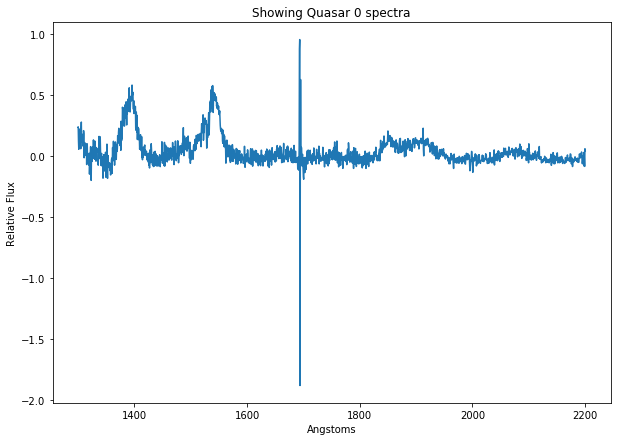

In [17]:
plt.clf()
plt.figure(figsize=[10,7])
plt.plot(qwave,qdata[:,0])
plt.xlabel("Angstoms")
plt.ylabel("Relative Flux")
plt.title("Showing Quasar 0 spectra")
plt.show()

In [18]:
# applying weights, need to be 2d
def weights(Xdata,Xweights):
    weighted=np.zeros(Xdata.shape[1])
    for i in range(0,Xdata.shape[1]):
        datatemp=Xdata[:,i]
        weightstemp=Xweights[:,i]
        weighted[i]=(np.sum(datatemp*weightstemp))/(np.sum(weightstemp))
    return weighted

def submean(Xdata,Xmean):
    meaned=np.zeros([Xdata.shape[0],Xdata.shape[1]])
    for i in range(0,Xdata.shape[0]):
        meaned[i,:]=Xdata[i,:]-Xmean[:]
    return meaned

In [19]:
qrewt = weights(qdata.copy(),qwght.copy())#weighting(qdata.copy(),qwght.copy())
print qrewt.shape
qsbmn = submean(qdata.copy(),qrewt.copy())#submean(qdata.copy(),qrewt.copy())
print qdata.shape,qsbmn.shape

(480,)
(1801, 480) (1801, 480)


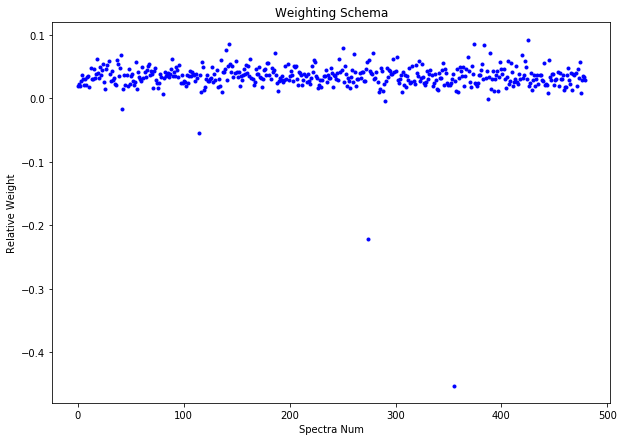

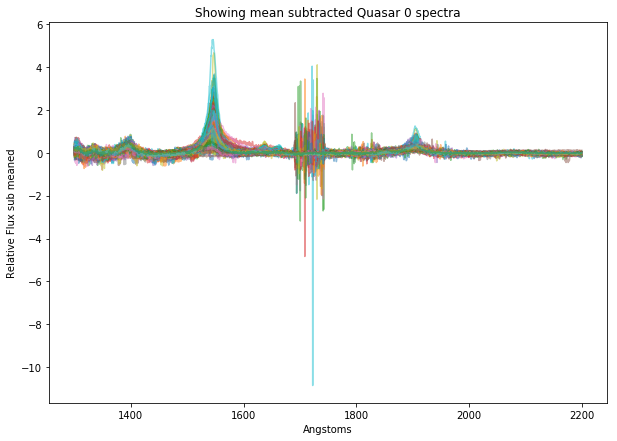

In [20]:
plt.clf()
plt.figure(figsize=[10,7])
plt.plot(qrewt,'b.')
plt.xlabel("Spectra Num")
plt.ylabel("Relative Weight")
plt.title("Weighting Schema")
plt.show()
plt.clf()
plt.figure(figsize=[10,7])
plt.plot(qwave,qsbmn,alpha=0.5)
plt.plot(qwave,qdata[:,0],color='green',label='raw',alpha=0.3)
plt.xlabel("Angstoms")
plt.ylabel("Relative Flux sub meaned")
plt.title("Showing mean subtracted Quasar 0 spectra")
plt.show()

### Part B

Run `empca.empca` on the now subtracted data.  Construct a model with 25 components.  

Print the fraction of variance attributed to each eigenvector.

Plot the first 4 eigenvectors.

#### There is an intelligent way to multiprocess this but can't get it to work properly quickly

In [23]:
nvecs=25
qrange=qdata.shape[1]
nverbose =False
filename = "hw9-NickReynolds-2b.pickle"
if os.path.isfile(filename):
    print(bcolors.OKGREEN + "File found"+bcolors._RST_)
    with open(filename,'r') as f:
        m = pickle.load(f)
else:
    print('going manual...')
    m=empca(qsbmn.T,weights=qwght.T, niter=25, nvec=nvecs, smooth=0, randseed=1, silent=nverbose)
    with open(filename,'w') as f:
        pickle.dump(m,f)
    if os.path.isfile(filename):
        print(bcolors.OKGREEN + "File has been created"+bcolors._RST_)
    else:
        print(bcolors.WARNING + "Failed, retry" + bcolors._RST_)
    

File found


Fractional Variance: [  8.52195594e-01   3.86335234e-02   1.35347818e-02   1.09928932e-02
   6.92570308e-03   4.05669873e-03   2.88336151e-03   2.49447946e-03
   1.65071369e-03   1.64252649e-03   1.56661078e-03   1.04930273e-03
   7.24971249e-04   7.59526091e-04   7.05630483e-04   6.84481543e-04
   6.34239652e-04   5.56133738e-04   4.20541501e-04   4.47917486e-04
   5.30471596e-04   4.43585080e-04   2.46489499e-04   4.87985495e-04
   3.51950700e-04]


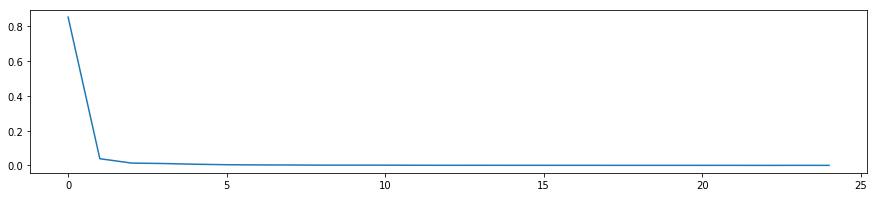

In [24]:
fractional=np.zeros(nvecs)
for x in range(nvecs):
    fractional[x]=m.R2vec(x)
print("Fractional Variance: {}".format(fractional))
plt.clf()
plt.figure(figsize=[15,3])
plt.plot(fractional)
plt.show()

In [25]:
print np.array(m.eigvec).shape

(25, 1801)


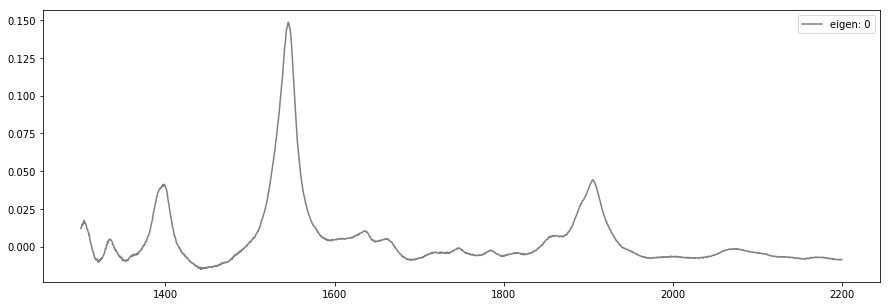

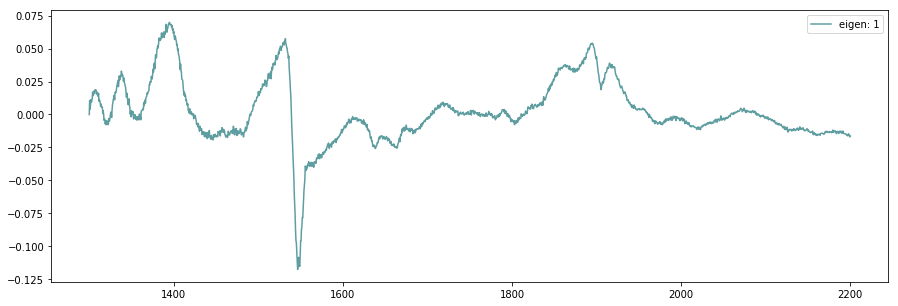

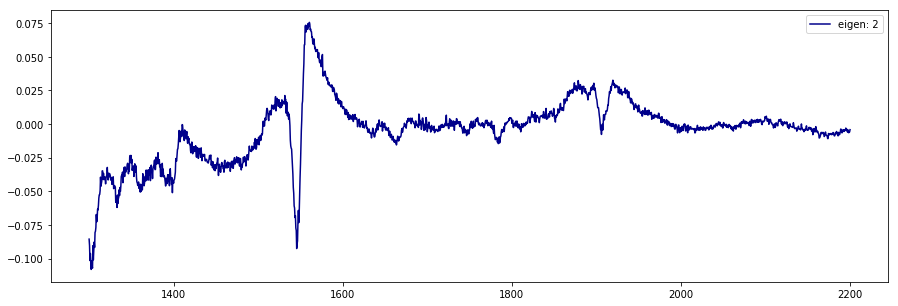

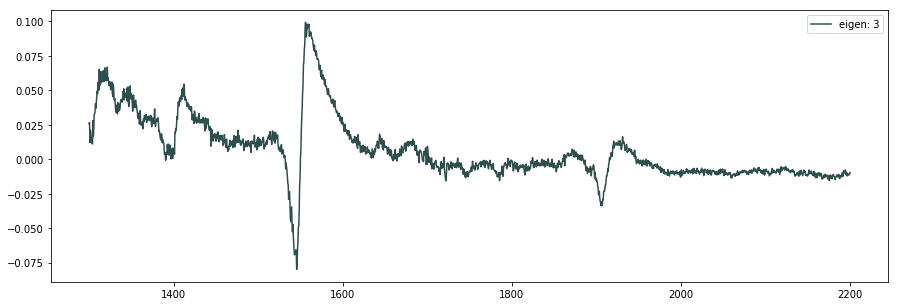

In [28]:
for p,q in enumerate(fractional[0:4]):
    plt.clf()
    plt.figure(figsize=[15,5])
    x = random.choice(range(len(colors.cnames)))
    colour = [j for i,j in enumerate(colors.cnames) if i==x][0]
    plt.plot(qwave,m.eigvec[p,:],color=colour,label="eigen: {}".format(p))
    plt.legend()
    plt.show()

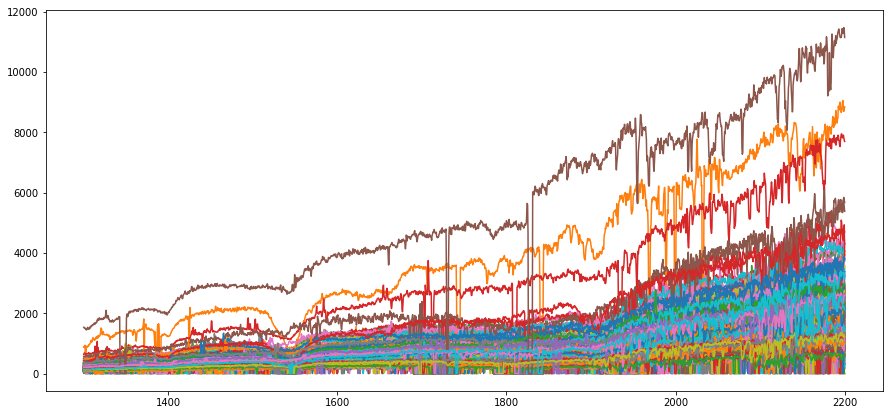

In [29]:
plt.clf()
plt.figure(figsize=[15,7])
plt.plot(qwave,qwght,label='submean')
plt.show()

### Part C

Plot the 400th object in the data (index = 400, not 399).  "Reconstruct" this object by summing contributions from the first few principal components with the mean calculated in part A.  In other words: plot the mean over the 400th object, then plot the mean plus the contribution from the 1st principal component over the object, and so on.  Do this for the first 4 principal components.

In [30]:
obnum=400
qmean = np.array([np.average([qdata[y,x] for x in range(qdata.shape[1])]) for y in range(qdata.shape[0])])

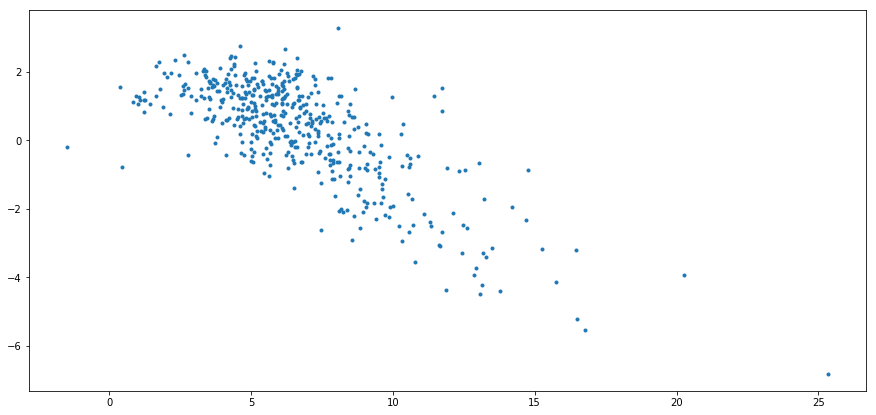

(480, 25)


In [31]:
plt.clf()
plt.figure(figsize=[15,7])
plt.plot(m.coeff[:,0],m.coeff[:,1],'.')
plt.show()
print m.coeff.shape

In [32]:
def residual(X,Y):
    return X-Y

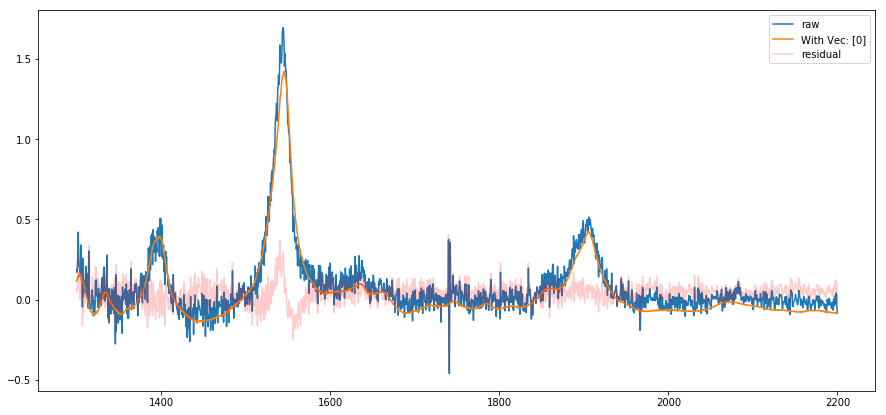

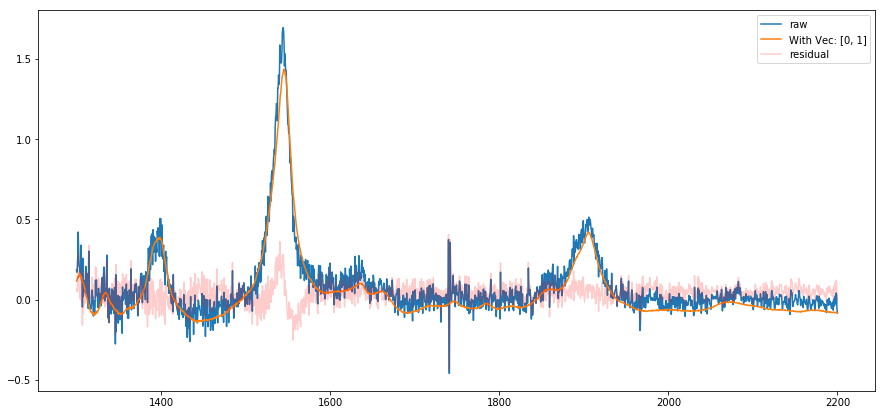

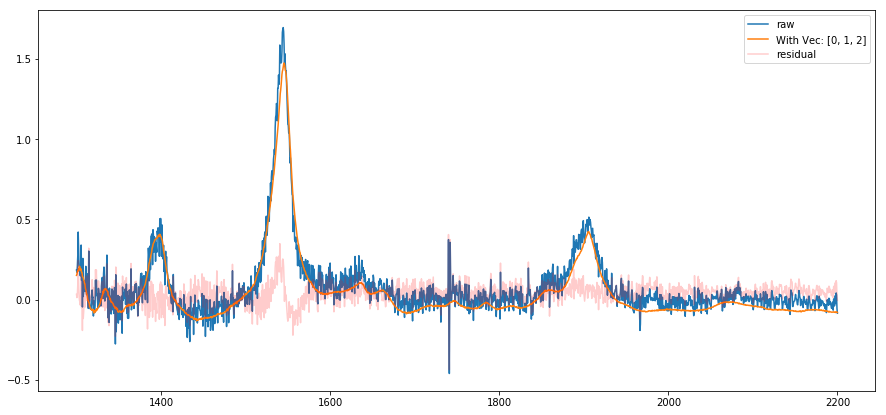

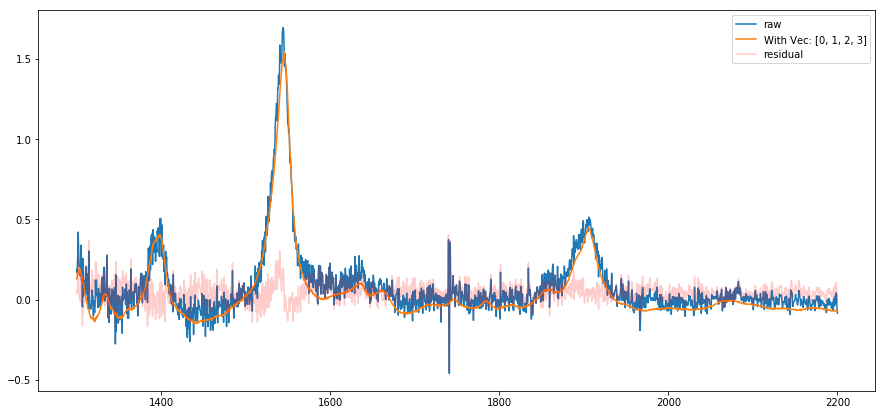

In [33]:
numvecs = 4
residuals = []
for k in range(numvecs):
    plt.clf()
    plt.figure(figsize=[15,7])
    temp = np.sum(np.array([m.coeff[obnum,x]*m.eigvec[x,:] for x in range(k+1)]),axis=0)
    plt.plot(qwave,qdata[:,obnum],label='raw')
    plt.plot(qwave,temp,label='With Vec: {}'.format(range(k+1)))
    residuals.append(residual(qdata[:,obnum],temp))
    plt.plot(qwave,residual(qdata[:,obnum],temp),label='residual',color='red',alpha=0.2)
    plt.legend()
    plt.show()

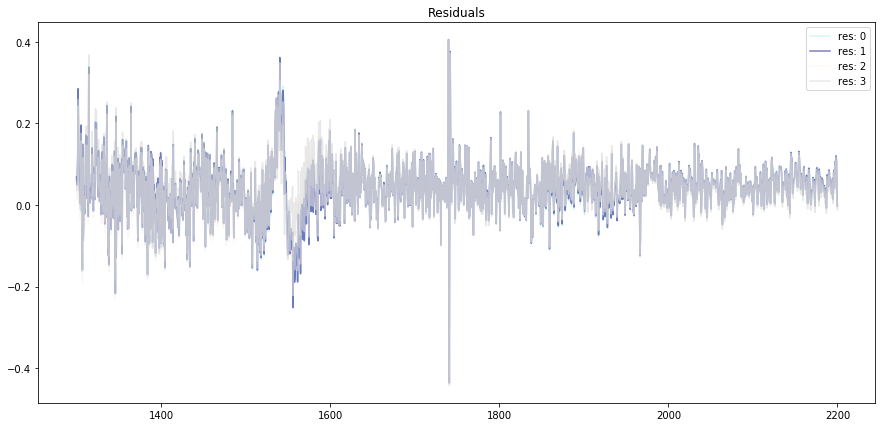

In [34]:
plt.clf()
plt.figure(figsize=[15,7])
plt.title("Residuals")
for q,p in enumerate(residuals):
    x = random.choice(range(len(colors.cnames)))
    sleep(0.1)
    colour = [j for i,j in enumerate(colors.cnames) if i==x][0]
    plt.plot(qwave,p,color=colour,label="res: {}".format(q),alpha=0.5)
plt.legend()
plt.show()

# Problem Z

Comment on the time this assignment required.

## \#AlexDon'tEver@Me
# 5 hours, it takes a lot longer figuring out how other peoples functions work than it does for the rest of the problems combined. Problem 2b took a few times over the time than number 1 took, most of it was figuring out how that EMPCA python code worked. Granted a good portion was trying to optimize it through multiple cores so  ¯\\_(ツ)_/¯